<a href="https://colab.research.google.com/github/kaytlyn724/MAT422/blob/main/HW3.5_3.6_K_means_and_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.5 K-means and 3.6 Support Vector Machine**

---

### **Key Concepts:**

*   3.5 K-means
*   3.6 Support vector machine

In [11]:
### important imports to run code ###

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

## **3.5 K-Means**

**K-Means:** k-means clustering is a popular method of vector quantization that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. k-means clustering minimizes within cluster variances (squared Euclidean distances), but not regular Euclidean distances. While k-means general converge quickly to a local optimum, the problem is computationally diﬀicult (NP-hard).

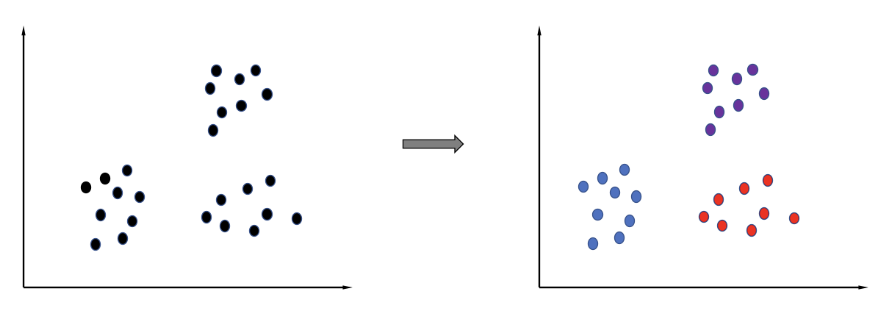

K-means Clustering Algorithm:
1. Clusters the data into k groups where k is predefined.
2. Select k points at random as cluster centers.
3. Assign objects to their closest cluster center according to the Euclidean distance function.
4. Calculate the centroid or mean of all objects in each cluster.
5. Repeat steps 2, 3 and 4 until the same points are assigned to each cluster in consecutive rounds.

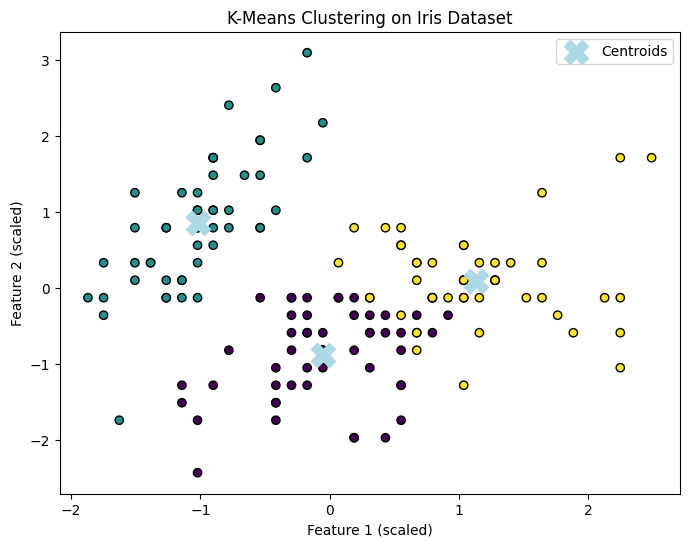

In [12]:
# Load the Iris dataset (using for the data in this example)
data = load_iris()
X = data.data

# Scale the data using the standard scalar from sklearn and fit it to the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit the K-Means model to the data (the scalar from before)
# Define the number of clusters (determined this after looking at the data)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

# Retrieve the cluster centroids and labels from the kmeans model
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the results om the kmeans clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='lightblue', marker='X', label='Centroids')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()

## **3.6 Support Vector Machine**

**Support Vector Machine:** Support-vector machines (SVMs) are supervised learning models in machine learning, which aim to analyze data for classification and regression analysis. Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other. The objective of the support vector machine algorithm is to find a hyperplane in a high dimensional space of the number of features that distinctly classifies the data points. An SVM maps training examples to points in space so as to maximize the width of the gap between the two categories. Predictions of new data are based on which side of the gap they fall.

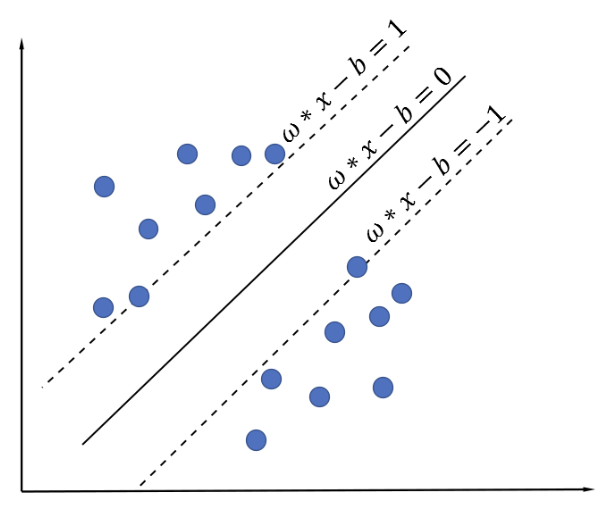

Hyperplane and margins for an SVM trained with samples from two classes. Samples on the margin are called the support vectors.

A hyperplane can be written as the set of points x satisfying
$w^T x − b = 0$,

where w is the normal vector to the hyperplane. If the training data is linearly
separable, we can select two parallel hyperplanes that separate the two classes
of data, so that the distance between them is as large as possible. The region
bounded by these two hyperplanes is called the ”margin”, and the maximum margin hyperplane is the hyperplane that lies halfway between them.

We are interested in two regions: anything on or above this
boundary is of one class, with label 1 and anything on or below this boundary
is of the other class, with label -1. The two hyperplanes can be respectively
described by the equations
$w^T x − b = 1$,
and
$w^T x − b = −1$.

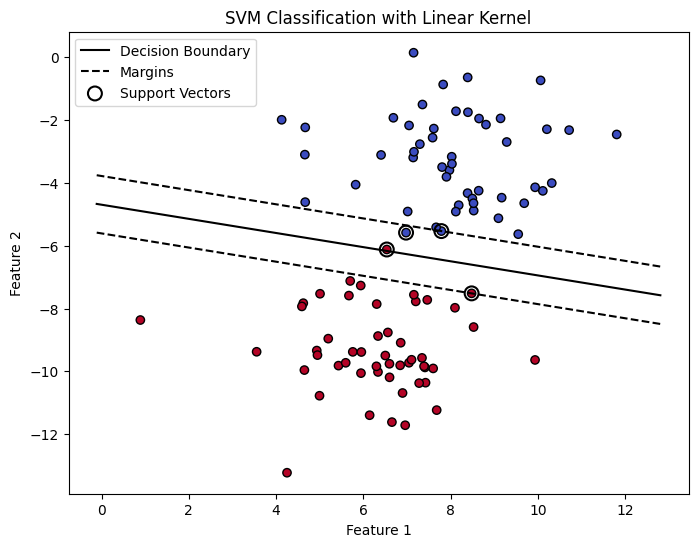

In [13]:
# Simple linearly separable dataset (to act as a good example for SVM)
X, y = make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=1.5)

# Create and fit the SVM model with a linear kernel fitting it to the data
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X, y)

# Get the separating hyperplane
w = svm_model.coef_[0]
slope = -w[0] / w[1]
intercept = -svm_model.intercept_[0] / w[1]

# Plot the decision boundary and margin
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o', edgecolor='k')

# Decision boundary
xx = np.linspace(x_min, x_max)
yy = slope * xx + intercept
plt.plot(xx, yy, 'k-', label='Decision Boundary')

# Plot margins using dashed to differentiate from the decision boundary
margin = 1 / np.linalg.norm(w)
yy_margin_pos = yy + np.sqrt(1 + slope**2) * margin
yy_margin_neg = yy - np.sqrt(1 + slope**2) * margin
plt.plot(xx, yy_margin_pos, 'k--')
plt.plot(xx, yy_margin_neg, 'k--', label='Margins')

# Highlight support vectors using circles (showing these help determine where the cuttoff is)
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, facecolors='none', edgecolor='k', linewidth=1.5, label='Support Vectors')

plt.title('SVM Classification with Linear Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()